## Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Step1: Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

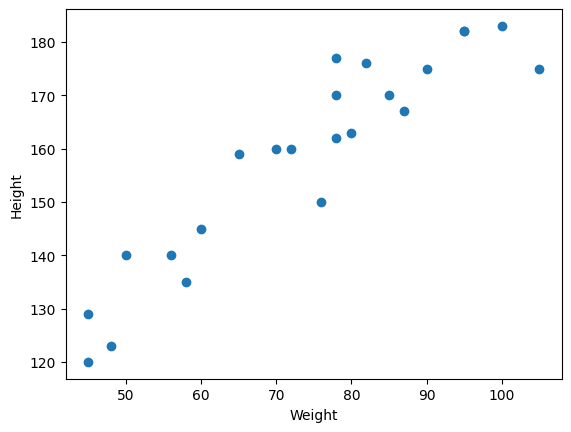

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [8]:
# divide our dataset into independent and dependent features
X=df[['Weight']] # idnependent feature
y=df['Height'] # dependent features

In [9]:
X.shape, y.shape

((23, 1), (23,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [14]:
y_train.shape,y_test.shape

((18,), (5,))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)

In [18]:
X_test=scaler.transform(X_test)

In [19]:
X_test


array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

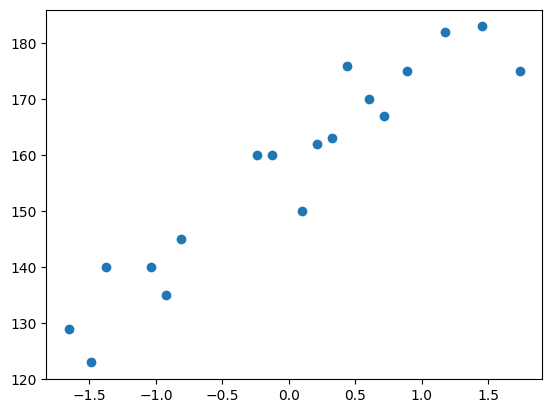

In [20]:
plt.scatter(X_train,y_train)

In [21]:
scaler.transform([[80]])

c:\Users\sankr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [22]:
## Model Training

from sklearn.linear_model import LinearRegression

In [23]:
regressor=LinearRegression()

In [24]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
regressor.intercept_

np.float64(157.5)

In [26]:
regressor.coef_

array([17.03440872])

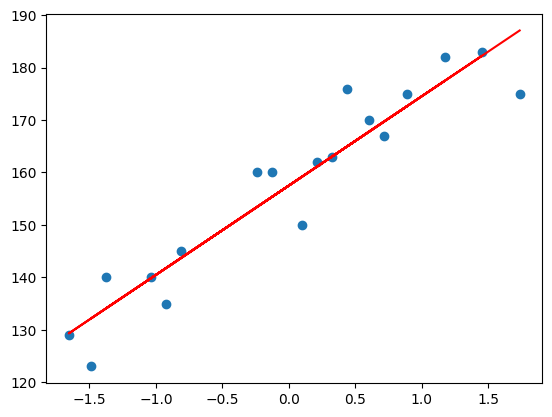

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [28]:
## Prediction for test data
y_pred_test=regressor.predict(X_test)

In [29]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [30]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE,MSE,RMSE

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r ssquared
## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [33]:
from sklearn.metrics import r2_score

In [34]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [35]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252